### Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import missingno
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline

#### Load the dataset

In [2]:
churn = pd.read_csv(r'Telco-Customer-Churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

<AxesSubplot:>

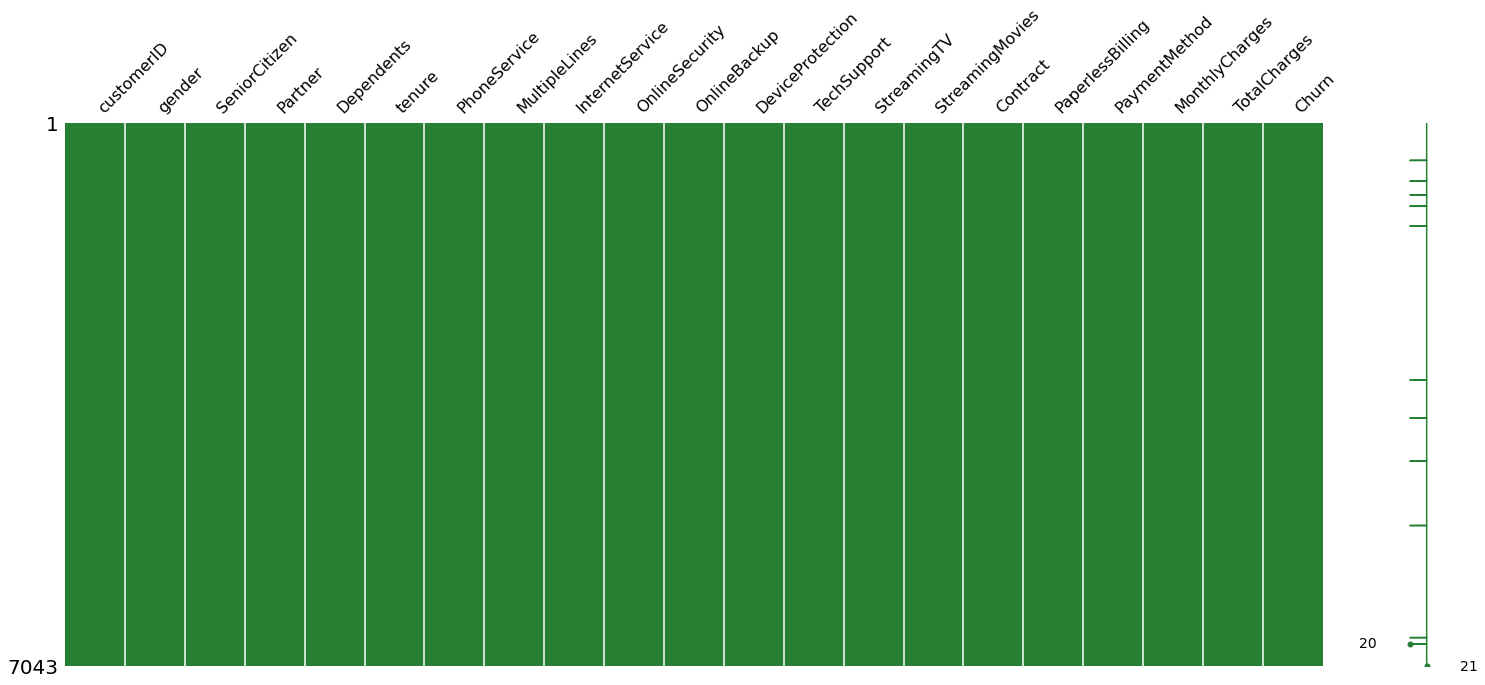

In [7]:
missingno.matrix(churn, color=(0.15, 0.5, 0.2))

### Further checking the dataset for blank or NaN values

In [8]:
# replacing all the blank values with NaN 
churn_clean = churn.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(churn_clean.isnull().sum()))

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



#### Initial Observation

1. There are 11 missing values in the TotalCharges feature
2. Dataset contains 20 columns with 7043 row

### Imputation: Fill Missing value with the median value of the TotalCharges feature

In [9]:
churn_clean['TotalCharges'].fillna(churn_clean.TotalCharges.median(), inplace=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(churn_clean.isnull().sum()))

Missing values (per feature): 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



### Exploratory Data Analysis

#### Churn count distribution

In [10]:
fig = px.bar(churn_clean, x=churn_clean.groupby('Churn')['tenure'].count().index, y=churn_clean.groupby('Churn')['Churn'].count().values,
             text =churn_clean.groupby('Churn')['Churn'].count(), color=churn_clean.Churn.unique())
fig.update_layout(title='Churn Distribution', xaxis_title='Churn', yaxis_title='count', template='plotly_dark')

In [11]:
colors = ['blue', 'green']
fig = px.pie(churn_clean, values=round(churn_clean.Churn.value_counts()*100 / len(churn),2),names=churn_clean.Churn.unique(),
      title='Percentage of Churn')
fig.update_layout(template='plotly_dark')
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo='label+percent', pull=[0.1, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

#### Observation
1. The churn data is imbalanced with 47% difference
2. 73.5 % of the churn value is No and 26.5% is YES

### Analyzing the numeric features of the dataset

In [12]:
from plotly.subplots import make_subplots
numericFeature = churn_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
a=numericFeature.columns

i=0
fig = make_subplots(rows=1, cols=3, subplot_titles=list(numericFeature.columns))
row = 1
for col in range(1,4):
    fig.add_trace(go.Box(y=numericFeature[a[i]], notched=True, name=a[i]),row = row, col = col)    
    fig.update_layout(title='Boxplot for tenure, MonthlyCharges and TotalCharges', template='plotly_dark')
    i+=1

fig

### Analysis of the categorical features

#### Gender vs Churn

In [13]:
gender = churn_clean.groupby(['gender', 'Churn'])['gender'].count().unstack()
gender.reset_index('gender')

Churn,gender,No,Yes
0,Female,2549,939
1,Male,2625,930


In [14]:
iplot(gender.iplot(asFigure=True, kind='bar', title='Churn by Gender', theme='solar', colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Female and Male user almost have the same churn count
2. Gender seems to be not a factor in churn

### Distribution of SeniorCitizen in terms of Churn

In [15]:
df = pd.crosstab(churn_clean['SeniorCitizen'],churn['Churn'])
df.reset_index('SeniorCitizen')

Churn,SeniorCitizen,No,Yes
0,0,4508,1393
1,1,666,476


In [16]:
iplot(df.iplot(asFigure=True, kind='bar', title='SeniorCitizen Churn Count', theme='solar'))

#### Obsevation
1. Almost half of the Senior citizen are churning
2. There seems to be a correlation between Senior citizen and churn

### Distribution of Partner in terms of Churn

In [17]:
df = pd.crosstab(churn_clean['Partner'],churn['Churn'])
df.reset_index('Partner')

Churn,Partner,No,Yes
0,No,2441,1200
1,Yes,2733,669


In [18]:
iplot(df.iplot(asFigure=True, kind='bar', title='Partner Churn Count', theme='solar'))

#### Obsevation
1. Almost half of the Partner are churning
2. There seems to be a correlation between Partner and churn

### Distribution of Dependents in terms of Churn

In [19]:
df = pd.crosstab(churn_clean['Dependents'],churn['Churn'])
df.reset_index('Dependents')

Churn,Dependents,No,Yes
0,No,3390,1543
1,Yes,1784,326


In [20]:
iplot(df.iplot(asFigure=True, kind='bar', title='Dependents Churn Count', theme='solar'))

#### Obsevation
1. Customer that are not dependents are churning more
2. There seems to be a correlation between Dependents and churn

### Tenure distribution in terms of Churn

In [21]:
df = pd.crosstab(churn_clean['tenure'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar', title='Tenure vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))


In [22]:
tenure_churn = churn_clean[churn_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False).head(10)
tenure_churn.sort_index()

1     380
2     123
3      94
4      83
5      64
6      40
7      51
8      42
9      46
10     45
Name: tenure, dtype: int64

In [23]:
fig = px.bar(tenure_churn, x=tenure_churn.sort_index().index, y=tenure_churn.sort_index().values, 
             text=tenure_churn.sort_index().values, title='Subscription Lifespan')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Customer Churn Count', template='plotly_dark')

#### Observation
1. As the years in tenure increases, less customer are churning
2. The tenure feature/field is important since there seems to be a correlation between tenure and churn

### Distribution of PaperlessBilling in term of Churn

In [24]:
df = pd.crosstab(churn_clean['PaperlessBilling'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='PaperlessBilling vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. There seem to be a correlation between Paperless billing and churn.
2. Customer with Paperless billing tend to churn more than customer with non paperless billing
3. While there seem to be a correlation, this doesn't imply causation on the churn class

### Payment Distribution in terms of Churn

In [25]:
df = pd.crosstab(churn_clean['PaymentMethod'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='PaymentMethod vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer using Electronic check has a higher churn count
2. Though it may look like there's a correlation, this doesnt imply causation

### PhoneService vs Churn

In [26]:
df = pd.crosstab(churn_clean['PhoneService'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='PhoneService vs Churn', theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer with PhoneService has a higher churn count

### MultipleLines vs Churn

In [27]:
df = pd.crosstab(churn_clean['MultipleLines'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='MultipleLines vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. With or without MultipleLines subscription, the churn count is the same
2. This might not be a factor in customer churning

### InternetService vs Churn

In [28]:
df = pd.crosstab(churn_clean['InternetService'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='InternetService vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer with fiber optic services are churning more compared to customer with only DSL service or no internet service
2. This might not be a factor for customer if the fiber optic service is bad. 

### OnlineSecurity vs Churn

In [29]:
df = pd.crosstab(churn_clean['OnlineSecurity'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='OnlineSecurity vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer without online security are churning more


### OnlineBackup vs Churn

In [30]:
df = pd.crosstab(churn_clean['OnlineBackup'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='OnlineBackup vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer without online backup are churning more

### DeviceProtection vs Churn

In [31]:
df = pd.crosstab(churn_clean['DeviceProtection'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='DeviceProtection vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer without device protection are churning more

### TechSupport vs Churn

In [32]:
df = pd.crosstab(churn_clean['TechSupport'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='TechSupport vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer without tech support are churning more

### StreamingTV vs Churn

In [33]:
df = pd.crosstab(churn_clean['StreamingTV'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='StreamingTV vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. There is not much difference in churn count for customers with or without StreamingTV

### StreamingMovies vs Churn

In [34]:
df = pd.crosstab(churn_clean['StreamingMovies'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='StreamingMovies vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. There is not much difference in churn count for customers with or without StreamingMovies

### Contract vs Churn

In [35]:
df = pd.crosstab(churn_clean['Contract'], churn['Churn'])
iplot(df.iplot(asFigure=True, kind='bar',title='Contract vs Churn', 
               theme='solar',colors={'Yes':'#33FF70', 'No':'#FF3371'}))

#### Observation
1. Customer with Month-to-Month contract are most likely to churn

### Distribution Summary of other categorical features

In [36]:
service = churn_clean[['PhoneService','MultipleLines','InternetService','OnlineSecurity',
                       'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]

columnNames = service.columns
fig = make_subplots(rows=3, cols=3, subplot_titles=columnNames)
i=0
for row in range(1,4):
    for col in range(1,4):
        fig.add_trace(go.Bar(x=service[columnNames[i]].value_counts().index,
                             y=service[columnNames[i]].value_counts().values, 
                             text=service[columnNames[i]].value_counts().values,
                             name=columnNames[i]),row = row, col = col)    
        fig.update_layout(template='plotly_dark')
        i+=1
        
fig.show()

In [37]:
fig = make_subplots(rows=3, cols=3, subplot_titles=columnNames + ' vs Churn')
i=0

for row in range(1,4):
    for col in range(1,4):
        df_cross = pd.crosstab(service[columnNames[i]],service['Churn'])
        for x in df_cross.columns:
            fig.add_trace(go.Bar(x=df_cross.index, y=df_cross[x], name='Churn '+ str(x)),row = row, col = col)    
        fig.update_layout(template='plotly_dark')
        i+=1    
fig.show()

### Observations
1. Almost 50% of the customer with phone service are churning
2. Customer with multiple lines will most likely churn
3. Customer with Fiber optic internet service will most likely churn
4. Customer with no online security service will most likely churn
5. Customer with no online backup service will most likely 
6. Customer with no device protection service will most likely churn
7. Customer with no tech support service will most likely churn

### Creating the Machine Learning Model

1. Handle the imbalanced dataset
2. Create a train-test split data
3. Create a pipeline

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
#preparing the feature and target
X = churn_clean.drop(columns=['Churn'])
y = churn_clean['Churn']

print(X.shape, y.shape)

(7043, 20) (7043,)


### Train Test Split with Stratification

In [40]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

### Creating Pipeline for each Machine Learning Models with default hyperparameter
The pipeline will have the following transformations:
1. Drop features that most likely will not affect the prediction of the target class
2. Perform onehot encoding on the categorical features
3. Perform standard scaling transformation of the numerical features

In [41]:
#reusable function to build a pipeline
def build_pipeline(model, withOverSampling):
    feature_to_drop = ['customerID', 'gender', 'MultipleLines', 'PaymentMethod', 'PaperlessBilling', 'StreamingTV', 'StreamingMovies']
    num_feat = ['tenure','MonthlyCharges', 'TotalCharges']
    cat_feat = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'Contract']

    #scale the numeric features
    num_pipeline = StandardScaler()

    #perform onehot encoding on the categorical features
    cat_pipeline = OneHotEncoder(handle_unknown='ignore')
    
    col_transform = ColumnTransformer(
        transformers=[
            ('drop_feat', 'drop', feature_to_drop),
            ('proc_num_feat', num_pipeline, num_feat),
            ('proc_cat_feat', cat_pipeline, cat_feat)
        ], remainder='passthrough'
    )
    
    if withOverSampling:
        mlpipeline = imbpipeline(steps = [
                        ['col_transform', col_transform],
                        ['smote', SMOTE(random_state=88)],   
                        ['classifier', model]
            ]
        )
    else:
         mlpipeline = imbpipeline(steps = [
                        ['col_transform', col_transform],  
                        ['classifier', model]
            ]
                            
         )
    
    return mlpipeline

In [42]:
def fit_pipeline(pipelines):
    for pipe in pipelines:
        pipe.fit(X_train, y_train)

In [43]:
pipeLines = []

pipeline_lr = build_pipeline(LogisticRegression(), False)
pipeLines.append(pipeline_lr)

pipeline_knn = build_pipeline(KNeighborsClassifier(n_neighbors=5), False)
pipeLines.append(pipeline_knn)

pipeline_dt = build_pipeline(DecisionTreeClassifier(criterion='entropy'), False)
pipeLines.append(pipeline_dt)

pipeline_svc = build_pipeline(SVC(probability=True), False)
pipeLines.append(pipeline_svc)

pipeline_gnb = build_pipeline(GaussianNB(), False)
pipeLines.append(pipeline_gnb)

In [44]:
# call fit_pipeline function
fit_pipeline(pipeLines)

### Testing the models and getting the metrics

Creating two resuable functions
1. printResults - prints the accuracy and confusion matrix of each model
2. plotROCAUC - plots the ROC-AUC of the ML models

In [45]:
def printResults(pipelines, result, pipe_dict):
    
    for i, model in enumerate(pipelines):
        print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))
        y_pred = model.predict(X_test)
        yproba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  yproba, pos_label='Yes')
        auc = roc_auc_score(y_test, yproba)
        print("{} Confusion Matrix: \n{}".format(pipe_dict[i], confusion_matrix(y_test, y_pred)))
        #plot_confusion_matrix(y_test, y_pred)
        print("\n")
        print(classification_report(y_test, y_pred))

        result = result.append({'classifiers':pipe_dict[i],
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
    result.set_index('classifiers', inplace=True)
    return result
    

In [46]:
def plotROCAUC(result_table):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()

In [47]:
pipe_dict = {0: 'Logistic Regression', 1: 'KNeighborsClassifier', 2:'Decision Tree', 
             3:'Support Vector Machine', 4:'Gaussian Naive Bayes'}

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

result_table=printResults(pipeLines, result_table, pipe_dict)

Logistic Regression Test Accuracy: 0.7995698924731183
Logistic Regression Confusion Matrix: 
[[1525  183]
 [ 283  334]]


              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1708
         Yes       0.65      0.54      0.59       617

    accuracy                           0.80      2325
   macro avg       0.74      0.72      0.73      2325
weighted avg       0.79      0.80      0.79      2325

KNeighborsClassifier Test Accuracy: 0.7681720430107527
KNeighborsClassifier Confusion Matrix: 
[[1495  213]
 [ 326  291]]


              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1708
         Yes       0.58      0.47      0.52       617

    accuracy                           0.77      2325
   macro avg       0.70      0.67      0.68      2325
weighted avg       0.76      0.77      0.76      2325

Decision Tree Test Accuracy: 0.7191397849462365
Decision Tree Confusion Matrix: 
[[1371  337]
 [ 316

### ROC-AUC Plot
This the the ROC-AUC plot for the 5 ML models without hyperparameters

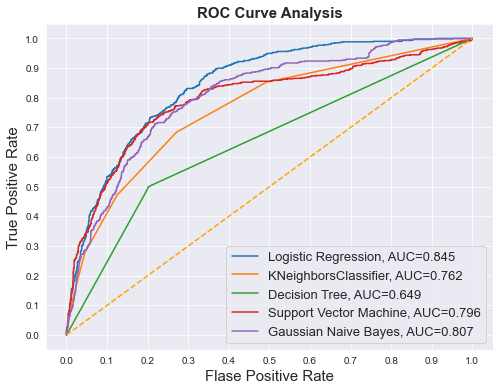

In [48]:
plotROCAUC(result_table)

### 

### Oversampling Minority Class (Churn:Yes) using SMOTE

In [49]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE, ADASYN

In [50]:
imbpipeLines = []

#imbpipeline for Logistic Regression
imbpipeline_lr = build_pipeline(LogisticRegression(random_state=11), True)
imbpipeLines.append(imbpipeline_lr)

#imbpipeline for KNN
imbpipeline_knn = build_pipeline(KNeighborsClassifier(n_neighbors=5), True)
imbpipeLines.append(imbpipeline_knn)

#imbpipeline for Decision Tree
imbpipeline_dt = build_pipeline(DecisionTreeClassifier(criterion='entropy'), True)
imbpipeLines.append(imbpipeline_dt)

#imbpipeline for Support Vector
imbpipeline_svc = build_pipeline(SVC(probability=True), True)
imbpipeLines.append(imbpipeline_svc)

#imbpipeline for Gaussian Naive Bayes
imbpipeline_gnb = build_pipeline(GaussianNB(), True)
imbpipeLines.append(imbpipeline_gnb)



In [ ]:
# call fit_pipeline function
fit_pipeline(imbpipeLines)

In [ ]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table=printResults(imbpipeLines, result_table, pipe_dict)
plotROCAUC(result_table)

### HyperParameter Tuning using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def buildGridSearch(pipe, param, scoring, cv):
    return GridSearchCV(estimator=pipe,
                        param_grid=param,
                        scoring=scoring,
                        cv=cv,
                        n_jobs=-1) 

In [ ]:
grid_param_lr = {
    'penalty': ('l1', 'l2'),
    'C': np.logspace(-3,3,10),
    'solver': ('lbfgs', 'liblinear')
}

grid_param_knn = {
    'n_neighbors': (1,10, 1),
    'algorithm': ('auto')
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

grid_param_dt = {
    
}

grid_param_svc = {
    
}

grid_param_gnb = {
    
}



In [ ]:
np.arange(10)+1

In [ ]:
np.logspace(-3,3,7)